# Lab IV: Linear Models

### Q0
1. What makes a model “linear”? “Linear” in what?
   a model is linear if it's linear in its parameters, which can be expressed in the y = a + bx form
2. How do you interpret the coefficient for a dummy/ one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.) There’s further explanation at the end of this document, if needed.
3. Can linear regression be used for classification? Explain why, or why not.
4. If you have a high accuracy on training but low on testing, what might be the problem? It’s also possible you’ll see a pattern in the residuals.
5. Review this page: Non-Linear with Linear What are two ways to incorporate nonlinear relationships between your target/response/dependent/outcome variable y and your features/control/response/independent variables x?
6. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

### Q1

In [15]:
import pandas as pd

nyc_data = pd.read_csv('/workspaces/DS-3021/data/Q1_clean.csv')

print(nyc_data.head())

   Price  Review Scores Rating Neighbourhood  Property Type        Room Type
0    549                  96.0      Manhattan     Apartment     Private room
1    149                 100.0       Brooklyn     Apartment  Entire home/apt
2    250                 100.0      Manhattan     Apartment  Entire home/apt
3     90                  94.0       Brooklyn     Apartment     Private room
4    270                  90.0      Manhattan     Apartment  Entire home/apt


In [16]:
print(nyc_data.columns)

Index(['Price', 'Review Scores Rating', 'Neighbourhood ', 'Property Type',
       'Room Type'],
      dtype='object')


In [28]:
nyc_data['Neighbourhood'] = nyc_data['Neighbourhood'].astype("category")
nyc_data['Property Type'] = nyc_data['Property Type'].astype("category")
nyc_data['Room Type'] = nyc_data['Room Type'].astype("category")
# Verify conversion
print(nyc_data.dtypes)

Price                      int64
Review Scores Rating     float64
Neighbourhood           category
Property Type           category
Room Type               category
Log Price                float64
Bronx                       bool
Brooklyn                    bool
Manhattan                   bool
Queens                      bool
Staten Island               bool
dtype: object


#### 1. Compute the average prices and scores by Neighborhood ; which borough is the most expensive on average? Create a kernel density plot of price and log price, grouping by Neighborhood .

In [30]:
# Group by 'Neighborhood' and calculate mean price and review scores
neighborhood_stats = nyc_data.groupby('Neighbourhood').agg({
    'Price': 'mean',
    'Review Scores Rating': 'mean'
}).reset_index()

# Rename columns for clarity
neighborhood_stats.columns = ['Neighbourhood', 'Average Price', 'Average Review Score']

print(neighborhood_stats)


   Neighbourhood  Average Price  Average Review Score
0          Bronx      75.276498             91.654378
1       Brooklyn     127.747378             92.363497
2      Manhattan     183.664286             91.801496
3         Queens      96.857233             91.549057
4  Staten Island     146.166667             90.843750


/tmp/ipykernel_2285/2210087341.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  neighborhood_stats = nyc_data.groupby('Neighbourhood').agg({


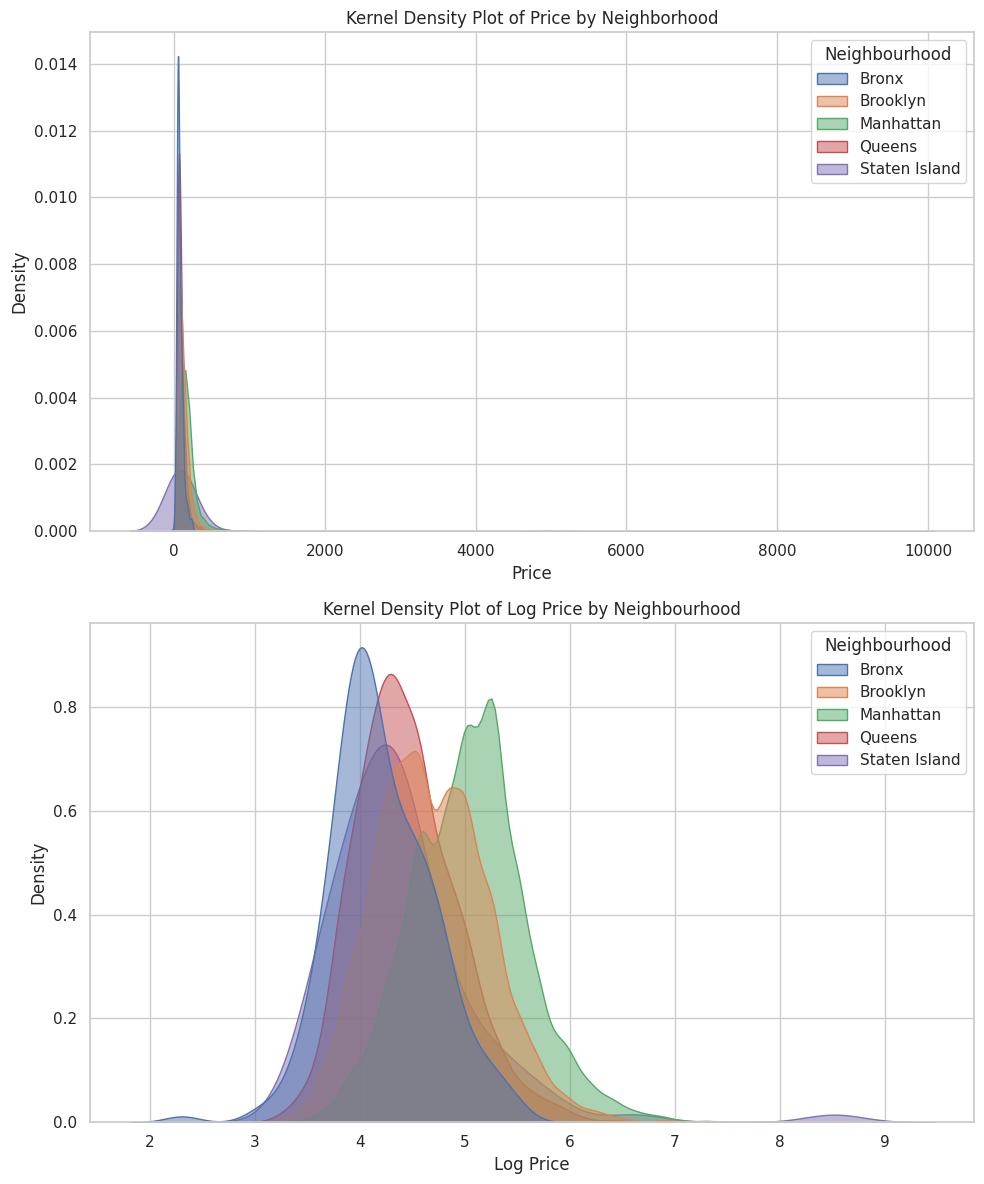

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Add a log-transformed price column
nyc_data['Log Price'] = np.log(nyc_data['Price'])

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Kernel density plot for Price
sns.kdeplot(data=nyc_data, x="Price", hue="Neighbourhood", fill=True, common_norm=False, alpha=0.5, ax=axes[0])
axes[0].set_title('Kernel Density Plot of Price by Neighborhood')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Density')

# Kernel density plot for Log Price
sns.kdeplot(data=nyc_data, x="Log Price", hue="Neighbourhood", fill=True, common_norm=False, alpha=0.5, ax=axes[1])
axes[1].set_title('Kernel Density Plot of Log Price by Neighbourhood')
axes[1].set_xlabel('Log Price')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()


#### 2. Regress price on Neighborhood by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

In [32]:
import statsmodels.api as sm

# Create dummy variables for Neighborhood without dropping the first category
neighborhood_dummies = pd.get_dummies(nyc_data['Neighbourhood'], drop_first=False)

# Fit the model without an intercept
model_no_intercept = sm.OLS(nyc_data['Price'], neighborhood_dummies).fit()

print(model_no_intercept.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     268.9
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          4.43e-226
Time:                        16:52:39   Log-Likelihood:            -1.4174e+05
No. Observations:               22153   AIC:                         2.835e+05
Df Residuals:                   22148   BIC:                         2.835e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Bronx            75.2765      9.868      7.628

In [33]:
import pandas as pd
import statsmodels.api as sm

# Create one-hot encoded variables for 'Neighborhood' without an intercept
neighborhood_dummies = pd.get_dummies(nyc_data['Neighbourhood'], drop_first=False)

# Add the one-hot encoded variables to the DataFrame
nyc_data = pd.concat([nyc_data, neighborhood_dummies], axis=1)

# Define the independent variables (one-hot encoded neighborhoods)
X = neighborhood_dummies

# Define the dependent variable (Price)
y = nyc_data['Price']

# Perform the linear regression without an intercept
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     268.9
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          4.43e-226
Time:                        16:52:44   Log-Likelihood:            -1.4174e+05
No. Observations:               22153   AIC:                         2.835e+05
Df Residuals:                   22148   BIC:                         2.835e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Bronx            75.2765      9.868      7.628

#### 3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

In [34]:
import pandas as pd
import statsmodels.api as sm

# Strip leading/trailing spaces from column names
nyc_data.columns = nyc_data.columns.str.strip()

# Create one-hot encoded variables for 'Neighborhood' with drop_first=True to drop the first category
neighborhood_dummies = pd.get_dummies(nyc_data['Neighbourhood'], drop_first=True)

# Convert dummy variables to numeric types
neighborhood_dummies = neighborhood_dummies.astype(int)

# Define the independent variables (one-hot encoded neighborhoods)
X = neighborhood_dummies

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Define the dependent variable (Price)
y = nyc_data['Price']

# Ensure there are no missing values
X = X.dropna()
y = y.dropna()

# Ensure all data types are numeric
X = X.apply(pd.to_numeric)
y = y.apply(pd.to_numeric)

# Perform the linear regression with an intercept
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     268.9
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          4.43e-226
Time:                        16:52:49   Log-Likelihood:            -1.4174e+05
No. Observations:               22153   AIC:                         2.835e+05
Df Residuals:                   22148   BIC:                         2.835e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            75.2765      9.868      7.628

#### 4. Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighborhood . What is the R^2 and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [36]:
print(X_train.dtypes)
print(y_train.dtypes)
print(X_train.head())
print(y_train.head())
print(X_train.isnull().sum())
print(y_train.isnull().sum())
print(X_train.shape, y_train.shape)
print(X_test.shape)


const                   float64
Review Scores Rating    float64
Brooklyn                   bool
Manhattan                  bool
Queens                     bool
Staten Island              bool
dtype: object
int64
       const  Review Scores Rating  Brooklyn  Manhattan  Queens  Staten Island
12829    1.0                  94.0      True      False   False          False
12333    1.0                  94.0      True      False   False          False
8225     1.0                  97.0     False       True   False          False
20638    1.0                  85.0      True      False   False          False
3682     1.0                  95.0      True      False   False          False
12829    125
12333    120
8225     250
20638     35
3682      80
Name: Price, dtype: int64
const                   0
Review Scores Rating    0
Brooklyn                0
Manhattan               0
Queens                  0
Staten Island           0
dtype: int64
0
(17722, 6) (17722,)
(4431, 6)


In [38]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Strip leading/trailing spaces from column names
nyc_data.columns = nyc_data.columns.str.strip()

# Split the data into an 80/20 training and test set
train_data, test_data = train_test_split(nyc_data, test_size=0.2, random_state=42)

# One-hot encode 'Neighborhood' and 'Property Type'
train_dummies_neighborhood = pd.get_dummies(train_data['Neighbourhood'], drop_first=True).astype(int)
test_dummies_neighborhood = pd.get_dummies(test_data['Neighbourhood'], drop_first=True).astype(int)

train_dummies_property_type = pd.get_dummies(train_data['Property Type'], drop_first=True).astype(int)
test_dummies_property_type = pd.get_dummies(test_data['Property Type'], drop_first=True).astype(int)

# Define the independent variables (Review Scores Rating + one-hot encoded neighborhoods and property types)
X_train = pd.concat([train_data['Review Scores Rating'], train_dummies_neighborhood, train_dummies_property_type], axis=1)
X_test = pd.concat([test_data['Review Scores Rating'], test_dummies_neighborhood, test_dummies_property_type], axis=1)

# Add a constant (intercept) to the model
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Ensure test set has the same columns as train set
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Define dependent variable (Price)
y_train = train_data['Price']
y_test = test_data['Price']

# Ensure all data types are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')
y_test = y_test.apply(pd.to_numeric, errors='coerce')

# Drop NaNs from X_train and realign y_train
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

# Perform the linear regression with an intercept
model = sm.OLS(y_train, X_train).fit()

# Print the summary of the regression model
print(model.summary())

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R-squared and RMSE on the test set
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R-squared: {r_squared}')
print(f'RMSE: {rmse}')

# Get the coefficient on Review Scores Rating
coef_review_scores_rating = model.params.get('Review Scores Rating', None)
print(f'Coefficient on Review Scores Rating: {coef_review_scores_rating}')

# Determine the most expensive kind of property you can rent
common_columns = list(set(model.params.index) & set(train_dummies_property_type.columns))
if common_columns:
    property_type_coefficients = model.params[common_columns]
    most_expensive_property_type = property_type_coefficients.idxmax()
    print(f'Most expensive kind of property you can rent: {most_expensive_property_type}')
else:
    print("No property type coefficients were found in the model parameters.")


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     51.46
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          2.52e-218
Time:                        17:12:00   Log-Likelihood:            -1.1339e+05
No. Observations:               17722   AIC:                         2.268e+05
Df Residuals:                   17699   BIC:                         2.270e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -49.2960 

#### 5. Run a regression of Price on Review Scores Rating and Neighborhood and Property Type. What is the R^2 and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [39]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Strip leading/trailing spaces from column names
nyc_data.columns = nyc_data.columns.str.strip()

# Split the data into an 80/20 training and test set
train_data, test_data = train_test_split(nyc_data, test_size=0.2, random_state=42)

# One-hot encode 'Neighborhood' and 'Property Type', convert to int
train_dummies_neighborhood = pd.get_dummies(train_data['Neighbourhood'], drop_first=True).astype(int)
test_dummies_neighborhood = pd.get_dummies(test_data['Neighbourhood'], drop_first=True).astype(int)

train_dummies_property_type = pd.get_dummies(train_data['Property Type'], drop_first=True).astype(int)
test_dummies_property_type = pd.get_dummies(test_data['Property Type'], drop_first=True).astype(int)

# Define independent variables (Review Scores Rating + one-hot encoded neighborhoods and property types)
X_train = pd.concat([train_data['Review Scores Rating'], train_dummies_neighborhood, train_dummies_property_type], axis=1)
X_test = pd.concat([test_data['Review Scores Rating'], test_dummies_neighborhood, test_dummies_property_type], axis=1)

# Add a constant (intercept) to the model
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Ensure test set has the same columns as train set
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Define dependent variable (Price)
y_train = train_data['Price']
y_test = test_data['Price']

# Ensure all data types are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')
y_test = y_test.apply(pd.to_numeric, errors='coerce')

# Drop NaNs
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

# Perform the linear regression with an intercept
model = sm.OLS(y_train, X_train).fit()

# Print the summary of the regression model
print(model.summary())

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R-squared and RMSE on the test set
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R-squared: {r_squared}')
print(f'RMSE: {rmse}')

# Get the coefficient on Review Scores Rating
coef_review_scores_rating = model.params['Review Scores Rating']
print(f'Coefficient on Review Scores Rating: {coef_review_scores_rating}')

# Determine the most expensive kind of property you can rent
common_columns = list(set(model.params.index) & set(train_dummies_property_type.columns))
property_type_coefficients = model.params[common_columns]
most_expensive_property_type = property_type_coefficients.idxmax()
print(f'Most expensive kind of property you can rent: {most_expensive_property_type}')


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     51.46
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          2.52e-218
Time:                        17:13:41   Log-Likelihood:            -1.1339e+05
No. Observations:               17722   AIC:                         2.268e+05
Df Residuals:                   17699   BIC:                         2.270e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -49.2960 

#### 6. What does the coefficient on Review Scores Rating mean if it changes from part 4 to 5? Hint: Think about how multiple linear regression works.

The change in the coefficient on Review Scores Rating from part 4 to part 5 highlights the importance of considering multiple variables in a regression model. It shows how the inclusion of additional relevant variables (like Property Type) can provide a more accurate and nuanced understanding of the relationships between variables.

### Q2. This question is a case study for linear models. The data are about car prices. In particular, they include:

- Price, Color, Seating_Capacity
- Body_Type: crossover, hatchback, muv, sedan, suv
- Make, Make_Year: The brand of car and year produced
- Mileage_Run: The number of miles on the odometer
- Fuel_Type: Diesel or gasoline/petrol
- Transmission, Transmission_Type: speeds and automatic/manual

#### 1. Load cars_hw.csv. These data were really dirty, and I’ve already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly skewed variables that require a log or arcsinh transformation) Note this is different than normalizing: there is a text below that explains further. Clean the data however you think is most appropriate.

In [40]:
cars_data = pd.read_csv('/workspaces/DS-3021/data/cars_hw.csv')

print(cars_data.head())

   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual   
3          1st                 5    petrol      5-Speed            Manual   
4          1st                 5    petrol      5-Speed            Manual   

    Price  
0  657000  
1  682000  
2  793000  
3  414000  
4  515000  


#### 2. Summarize the Price variable and create a kernel density plot. Use .groupby() and .describe() to summarize prices by brand (Make). Make a grouped kernel density plot by Make. Which car brands are the most expensive? What do prices look like in general?

   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual   
3          1st                 5    petrol      5-Speed            Manual   
4          1st                 5    petrol      5-Speed            Manual   

    Price  
0  657000  
1  682000  
2  793000  
3  414000  
4  515000  
Summary of Price variable:
count

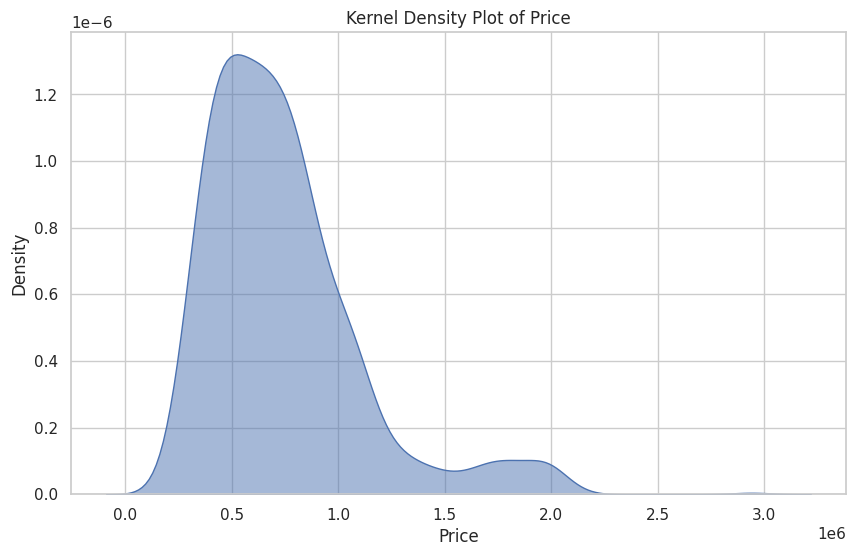

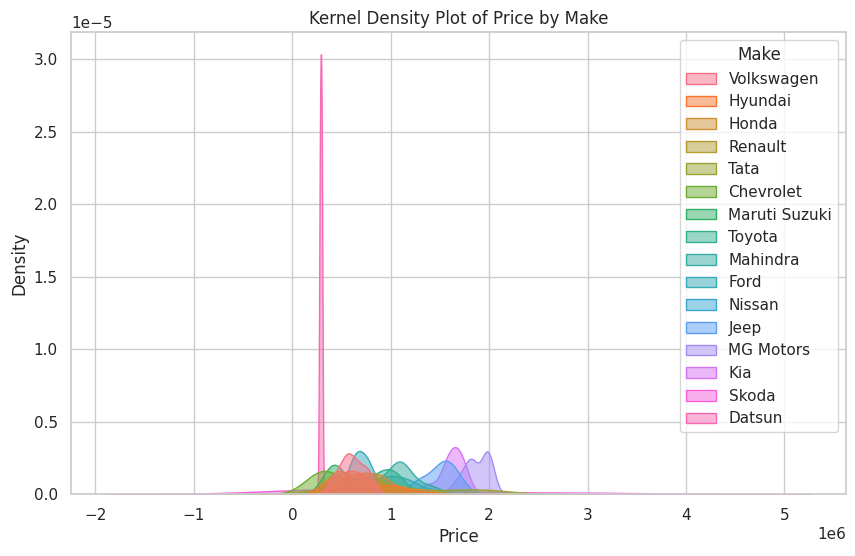

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
cars_data = pd.read_csv('/workspaces/DS-3021/data/cars_hw.csv')

# Print the first few rows of the data
print(cars_data.head())

# Summarize the Price variable
price_summary = cars_data['Price'].describe()
print("Summary of Price variable:")
print(price_summary)

# Summarize prices by brand (Make)
price_by_make_summary = cars_data.groupby('Make')['Price'].describe()
print("\nSummary of Prices by Make:")
print(price_by_make_summary)

# Create a kernel density plot for Price
plt.figure(figsize=(10, 6))
sns.kdeplot(data=cars_data, x="Price", fill=True, common_norm=False, alpha=0.5)
plt.title('Kernel Density Plot of Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

# Create a grouped kernel density plot by Make
plt.figure(figsize=(10, 6))
sns.kdeplot(data=cars_data, x="Price", hue="Make", fill=True, common_norm=False, alpha=0.5)
plt.title('Kernel Density Plot of Price by Make')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

#### 3. Split the data into an 80% training set and a 20% testing set.

   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual   
3          1st                 5    petrol      5-Speed            Manual   
4          1st                 5    petrol      5-Speed            Manual   

    Price  
0  657000  
1  682000  
2  793000  
3  414000  
4  515000  
Summary of Price variable in the

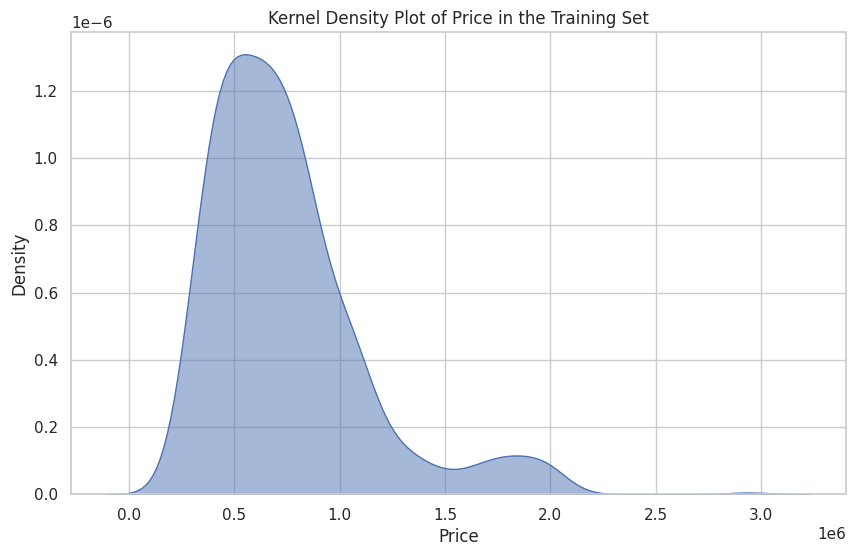

/tmp/ipykernel_2285/4268374221.py:35: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=train_data, x="Price", hue="Make", fill=True, common_norm=False, alpha=0.5)


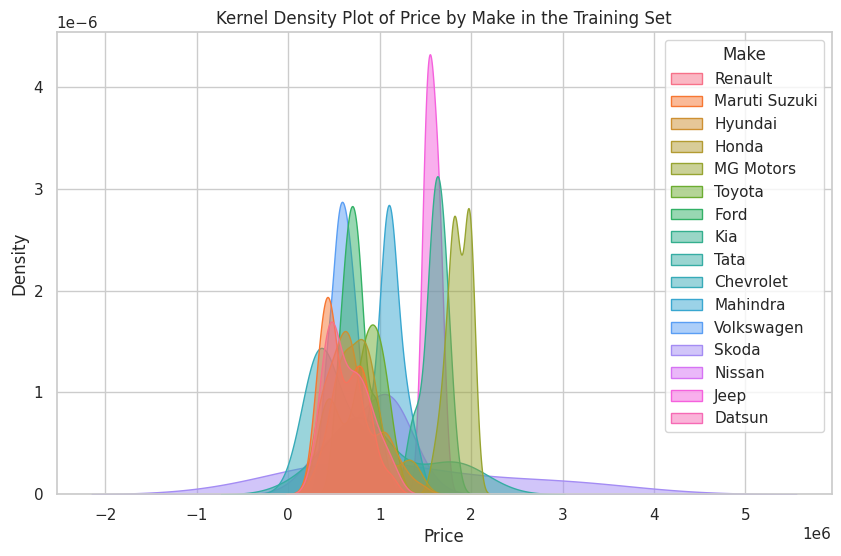

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the data
cars_data = pd.read_csv('/workspaces/DS-3021/data/cars_hw.csv')

# Print the first few rows of the data
print(cars_data.head())

# Split the data into an 80/20 training and test set
train_data, test_data = train_test_split(cars_data, test_size=0.2, random_state=42)

# Summarize the Price variable in the training set
price_summary = train_data['Price'].describe()
print("Summary of Price variable in the training set:")
print(price_summary)

# Summarize prices by brand (Make) in the training set
price_by_make_summary = train_data.groupby('Make')['Price'].describe()
print("\nSummary of Prices by Make in the training set:")
print(price_by_make_summary)

# Create a kernel density plot for Price in the training set
plt.figure(figsize=(10, 6))
sns.kdeplot(data=train_data, x="Price", fill=True, common_norm=False, alpha=0.5)
plt.title('Kernel Density Plot of Price in the Training Set')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

# Create a grouped kernel density plot by Make in the training set
plt.figure(figsize=(10, 6))
sns.kdeplot(data=train_data, x="Price", hue="Make", fill=True, common_norm=False, alpha=0.5)
plt.title('Kernel Density Plot of Price by Make in the Training Set')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

#### 4. Make a model where you regress price on the numeric variables alone; what is the R^2 and RMSE on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use pd.get_dummies(); be careful of the dummy variable trap); what is the R^2 and RMSE on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the R^2 and RMSE on the test set? Does the joint model perform better or worse, and by home much?

#### 1st model

In [47]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the data
cars_data = pd.read_csv('/workspaces/DS-3021/data/cars_hw.csv')

# Print the first few rows of the data
print(cars_data.head())

# Split the data into an 80/20 training and test set
train_data, test_data = train_test_split(cars_data, test_size=0.2, random_state=42)

# Select numeric variables for the regression model
numeric_vars = train_data.select_dtypes(include=[np.number]).columns.tolist()
numeric_vars.remove('Price')  # Remove the dependent variable from the list of independent variables

# Define the independent variables (numeric variables)
X_train = train_data[numeric_vars]
X_test = test_data[numeric_vars]

# Add a constant (intercept) to the model
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Define the dependent variable (Price)
y_train = train_data['Price']
y_test = test_data['Price']

# Ensure all data types are numeric
X_train = X_train.apply(pd.to_numeric)
y_train = y_train.apply(pd.to_numeric)
X_test = X_test.apply(pd.to_numeric)
y_test = y_test.apply(pd.to_numeric)

# Perform the linear regression with an intercept
model = sm.OLS(y_train, X_train).fit()

# Print the summary of the regression model
print(model.summary())

# Predict on the training set
y_train_pred = model.predict(X_train)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Calculate R-squared and RMSE on the training set
r_squared_train = model.rsquared
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Calculate R-squared and RMSE on the test set
r_squared_test = model.rsquared
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'R-squared on the training set: {r_squared_train}')
print(f'RMSE on the training set: {rmse_train}')
print(f'R-squared on the test set: {r_squared_test}')
print(f'RMSE on the test set: {rmse_test}')

   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual   
3          1st                 5    petrol      5-Speed            Manual   
4          1st                 5    petrol      5-Speed            Manual   

    Price  
0  657000  
1  682000  
2  793000  
3  414000  
4  515000  
                            OLS 

#### 2nd model

In [50]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

# Load the data
cars_data = pd.read_csv('/workspaces/DS-3021/data/cars_hw.csv')

# Print the first few rows of the data
print(cars_data.head())

# Split the data into an 80/20 training and test set
train_data, test_data = train_test_split(cars_data, test_size=0.2, random_state=42)

# One-Hot Encode Categorical Variables
categorical_vars = train_data.select_dtypes(include=['object']).columns.tolist()
# Select categorical variables
categorical_vars = train_data.select_dtypes(include=['object']).columns.tolist()

# Only remove 'Price' if it exists in the list
if 'Price' in categorical_vars:
    categorical_vars.remove('Price')

# Create one-hot encoded variables for the categorical variables, dropping the first category to avoid the dummy variable trap
train_dummies = pd.get_dummies(train_data[categorical_vars], drop_first=True)
test_dummies = pd.get_dummies(test_data[categorical_vars], drop_first=True)

# Ensure the test set has the same dummy variables as the training set
test_dummies = test_dummies.reindex(columns=train_dummies.columns, fill_value=0)

# Define the independent variables (one-hot encoded categorical variables)
X_train = train_dummies
X_test = test_dummies

# Add a constant (intercept) to the model
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Define the dependent variable (Price)
y_train = train_data['Price']
y_test = test_data['Price']

# Ensure all data types are numeric
X_train = X_train.apply(pd.to_numeric)
y_train = y_train.apply(pd.to_numeric)
X_test = X_test.apply(pd.to_numeric)
y_test = y_test.apply(pd.to_numeric)

# Perform the linear regression with an intercept
model = sm.OLS(y_train, X_train).fit()

# Print the summary of the regression model
print(model.summary())

# Predict on the training set
y_train_pred = model.predict(X_train)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Calculate R-squared and RMSE on the training set
r_squared_train = model.rsquared
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Calculate R-squared and RMSE on the test set
r_squared_test = model.rsquared
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'R-squared on the training set: {r_squared_train}')
print(f'RMSE on the training set: {rmse_train}')
print(f'R-squared on the test set: {r_squared_test}')
print(f'RMSE on the test set: {rmse_test}')

   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual   
3          1st                 5    petrol      5-Speed            Manual   
4          1st                 5    petrol      5-Speed            Manual   

    Price  
0  657000  
1  682000  
2  793000  
3  414000  
4  515000  


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

#### 3rd model

In [45]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the data
cars_data = pd.read_csv('/workspaces/DS-3021/data/cars_hw.csv')

# Print the first few rows of the data
print(cars_data.head())

# Split the data into an 80/20 training and test set
train_data, test_data = train_test_split(cars_data, test_size=0.2, random_state=42)

# Select numeric variables for the regression model
numeric_vars = train_data.select_dtypes(include=[np.number]).columns.tolist()
numeric_vars.remove('Price')  # Remove the dependent variable from the list of independent variables

# One-Hot Encode Categorical Variables
categorical_vars = train_data.select_dtypes(include=['object']).columns.tolist()
categorical_vars.remove('Price')  # Remove the dependent variable from the list of independent variables

# Create one-hot encoded variables for the categorical variables, dropping the first category to avoid the dummy variable trap
train_dummies = pd.get_dummies(train_data[categorical_vars], drop_first=True)
test_dummies = pd.get_dummies(test_data[categorical_vars], drop_first=True)

# Ensure the test set has the same dummy variables as the training set
test_dummies = test_dummies.reindex(columns=train_dummies.columns, fill_value=0)

# Combine numeric and one-hot encoded categorical variables
X_train = pd.concat([train_data[numeric_vars], train_dummies], axis=1)
X_test = pd.concat([test_data[numeric_vars], test_dummies], axis=1)

# Add a constant (intercept) to the model
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Define the dependent variable (Price)
y_train = train_data['Price']
y_test = test_data['Price']

# Ensure all data types are numeric
X_train = X_train.apply(pd.to_numeric)
y_train = y_train.apply(pd.to_numeric)
X_test = X_test.apply(pd.to_numeric)
y_test = y_test.apply(pd.to_numeric)

# Perform the linear regression with an intercept
model = sm.OLS(y_train, X_train).fit()

# Print the summary of the regression model
print(model.summary())

# Predict on the training set
y_train_pred = model.predict(X_train)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Calculate R-squared and RMSE on the training set
r_squared_train = model.rsquared
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Calculate R-squared and RMSE on the test set
r_squared_test = model.rsquared
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'R-squared on the training set: {r_squared_train}')
print(f'RMSE on the training set: {rmse_train}')
print(f'R-squared on the test set: {r_squared_test}')
print(f'RMSE on the test set: {rmse_test}')

   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual   
3          1st                 5    petrol      5-Speed            Manual   
4          1st                 5    petrol      5-Speed            Manual   

    Price  
0  657000  
1  682000  
2  793000  
3  414000  
4  515000  


ValueError: list.remove(x): x not in list

#### 5. Use the PolynomialFeatures function from sklearn to expand the set of numerical variables you’re using in the regression. As you increase the degree of the expansion, how do the R^2 and RMSE change? At what point does R^2 go negative on the test set? For your best model with expanded features, what is the R^2 and RMSE? How does it compare to your best model from part 4?

#### 6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

### Q3

#### 1. Find a dataset on a topic you’re interested in. Some easy options are data.gov, kaggle.com, and data.world.

#### 2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.

#### 3. Split the sample into an ~80% training set and a ~20% test set.

#### 4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the RMSE on the test set.

#### 5. Which model performed the best, and why?

#### 6. What did you learn?